In [1]:
# check version
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

CIFAR dataset Wiki: https://en.wikipedia.org/wiki/CIFAR-10

CIFAR dataset link: https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (X_test, y_test) = cifar10.load_data()

Note that the dataset is already split into a training set, but there is no validation set, so we will create it now. Additionally, we must scale the input features. For that we dividing them by 255 which it convert them to floats as well:

In [4]:
X_train, X_valid = train_images[:10000], train_images[10000:20000]
y_train, y_valid = train_labels[:10000], train_labels[10000:20000]

In [5]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [6]:
print('Train      : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Train      :  (10000, 32, 32, 3)
Validation :  (10000, 32, 32, 3)
Test       :  (10000, 32, 32, 3)


Lets visualise data

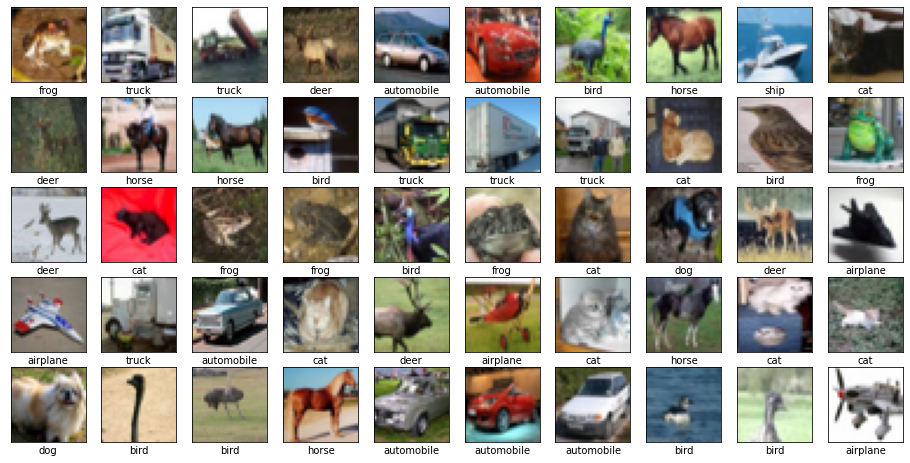

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

Import Sequential model and necessary Layer classes

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, AvgPool2D, MaxPool2D, Dropout

# CNN Model

In [9]:
CNN_model = tf.keras.Sequential([
    # Convolution Layers
    Conv2D(32, 3, padding='same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(32, 3, padding='same', activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.25),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2),
    Dropout(0.25),
    
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [10]:
CNN_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [11]:
import timeit

numberOfEpochs = 25
%time h = CNN_model.fit(X_train, y_train, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid, y_valid))

Epoch 1/25
313/313 [==============================] - 24s 75ms/step - loss: 2.1229 - accuracy: 0.2059 - val_loss: 1.6764 - val_accuracy: 0.3917
Epoch 2/25
313/313 [==============================] - 21s 68ms/step - loss: 1.6372 - accuracy: 0.3970 - val_loss: 1.3918 - val_accuracy: 0.5023
Epoch 3/25
313/313 [==============================] - 21s 68ms/step - loss: 1.3705 - accuracy: 0.5003 - val_loss: 1.2812 - val_accuracy: 0.5440
Epoch 4/25
313/313 [==============================] - 23s 73ms/step - loss: 1.2303 - accuracy: 0.5646 - val_loss: 1.2227 - val_accuracy: 0.5640
Epoch 5/25
313/313 [==============================] - 22s 70ms/step - loss: 1.1189 - accuracy: 0.5904 - val_loss: 1.1402 - val_accuracy: 0.6009
Epoch 6/25
313/313 [==============================] - 22s 71ms/step - loss: 1.0108 - accuracy: 0.6295 - val_loss: 1.0784 - val_accuracy: 0.6192
Epoch 7/25
313/313 [==============================] - 22s 71ms/step - loss: 0.9017 - accuracy: 0.6823 - val_loss: 1.0536 - val_accuracy:

In [12]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

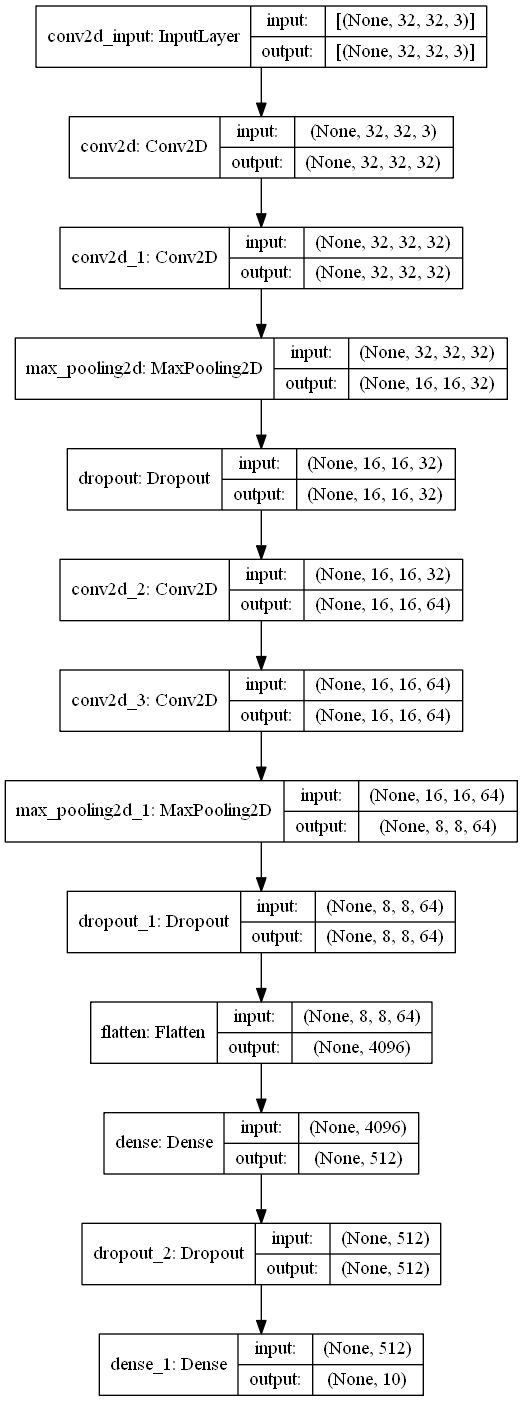

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(CNN_model, show_shapes=True, show_layer_names=True)

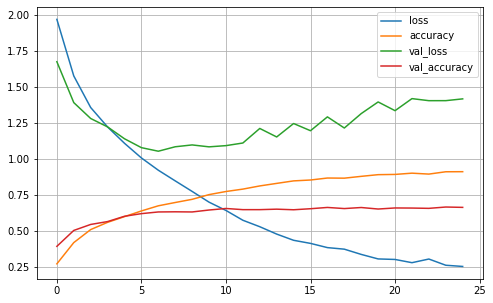

In [14]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[int(predicted_label)],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

In [16]:
def plot_value_array(i, predictions_array, true_label):
  true_label = int(true_label[int(i)])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = int(np.argmax(predictions_array))

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [17]:
def show_example_prediction(i, predictions):
  print('Probability of output neurons for first test data:\n', predictions[i])
  print()

  print('Neuron having maximum probability (prediction) is ', np.argmax(predictions[i]), ' and corresponding label is ', class_names[np.argmax(predictions[i])])
  print('True label index ', y_test[i], ' and corresponding label is ', class_names[int(y_test[i])])
  print()

  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  y_test)
  plt.show()

In [18]:
def show_15_predictions(predictions):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], y_test, X_test)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], y_test)
    plt.tight_layout()
    plt.show()    

In [19]:
predictions = CNN_model.predict(X_test)

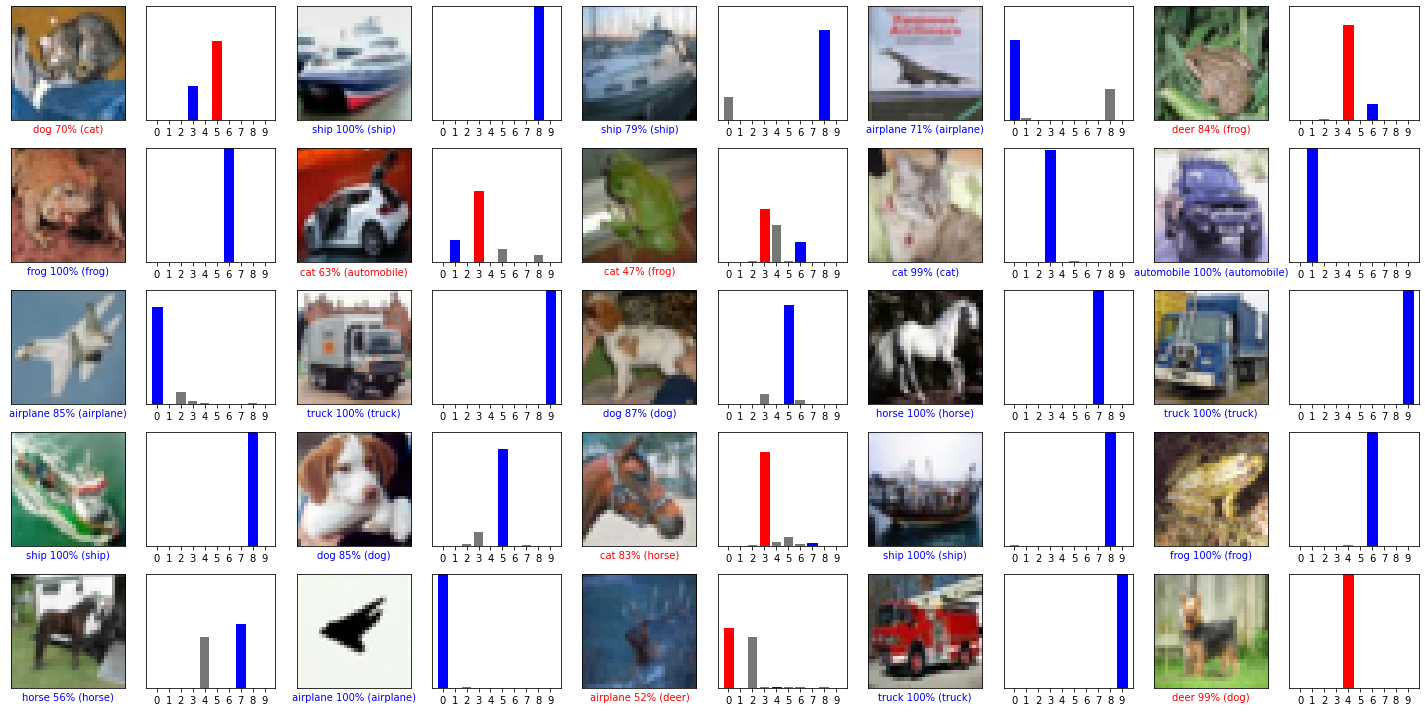

In [20]:
show_15_predictions(predictions)

In [21]:
test_loss, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.6618000268936157


# Transfer Learning

In [22]:
#pip install --upgrade tensorflow-hub

In [23]:
import tensorflow_hub as hub

In [24]:
feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extractor_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [25]:
TL_model = tf.keras.Sequential([
  feature_extractor_layer,
  Dense(10, 'softmax')
])

In [26]:
TL_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
X_train_224x224 = tf.image.resize(X_train, [224,224])
X_valid_224x224 = tf.image.resize(X_valid, [224,224])
X_test_224x224 = tf.image.resize(X_test, [224,224])

In [28]:
print('Train      : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Train      :  (10000, 32, 32, 3)
Validation :  (10000, 32, 32, 3)
Test       :  (10000, 32, 32, 3)


<b>Before Transfer Learning (training)</b>

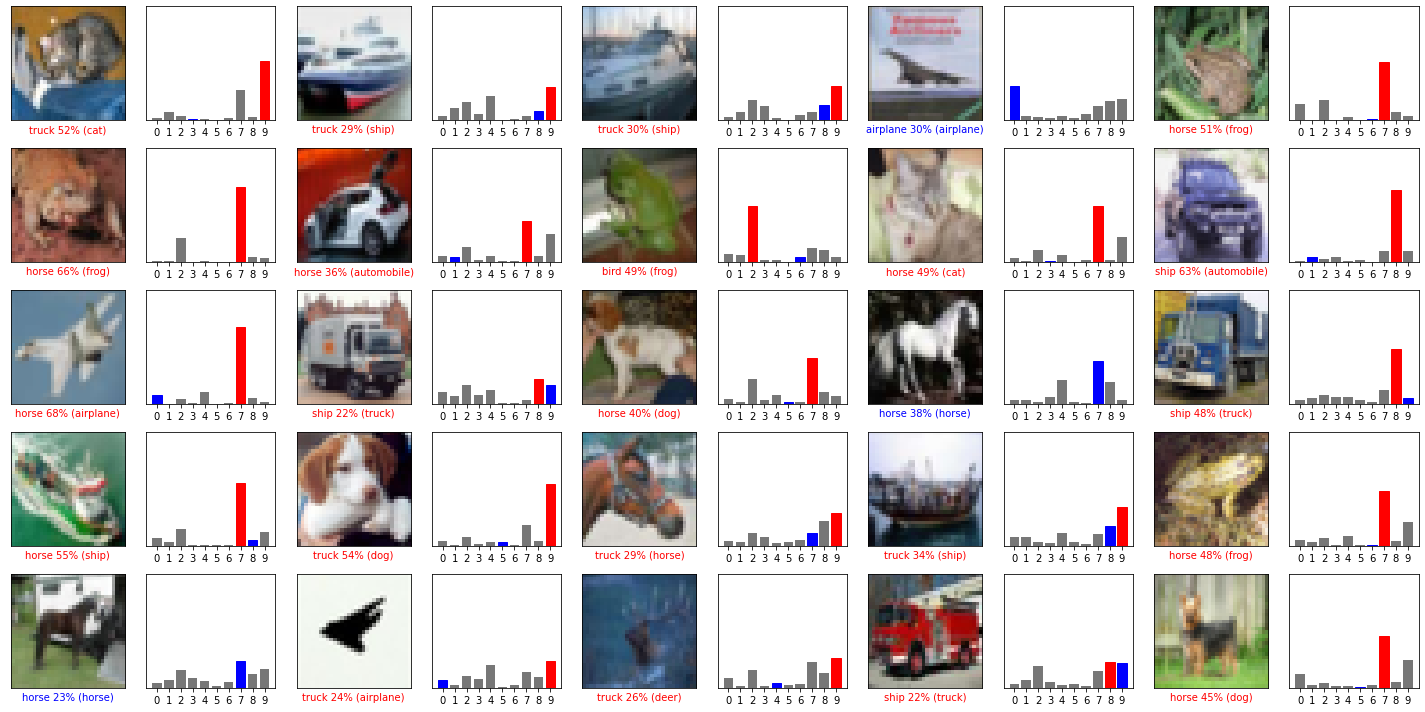

In [29]:
predictions = TL_model.predict(X_test_224x224)

show_15_predictions(predictions)

In [30]:
TL_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [31]:
test_loss, test_acc = TL_model.evaluate(X_test_224x224, y_test, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 126s 402ms/step - loss: 2.8285 - accuracy: 0.1411

Test accuracy: 0.14239999651908875


<b>Lets Do Transfer Learning (training)</b>

In [32]:
import timeit

numberOfEpochs = 10
%time h = TL_model.fit(X_train_224x224, y_train, epochs=numberOfEpochs, shuffle=True, validation_data=(X_valid_224x224, y_valid))

Epoch 1/10
313/313 [==============================] - 299s 946ms/step - loss: 0.8002 - accuracy: 0.7306 - val_loss: 0.5628 - val_accuracy: 0.8012
Epoch 2/10
313/313 [==============================] - 289s 925ms/step - loss: 0.4914 - accuracy: 0.8274 - val_loss: 0.5360 - val_accuracy: 0.8118
Epoch 3/10
313/313 [==============================] - 284s 909ms/step - loss: 0.4272 - accuracy: 0.8567 - val_loss: 0.5025 - val_accuracy: 0.8233
Epoch 4/10
313/313 [==============================] - 284s 909ms/step - loss: 0.3822 - accuracy: 0.8679 - val_loss: 0.4910 - val_accuracy: 0.8293
Epoch 5/10
313/313 [==============================] - 276s 883ms/step - loss: 0.3452 - accuracy: 0.8812 - val_loss: 0.4972 - val_accuracy: 0.8270
Epoch 6/10
313/313 [==============================] - 269s 861ms/step - loss: 0.3255 - accuracy: 0.8873 - val_loss: 0.4902 - val_accuracy: 0.8326
Epoch 7/10
313/313 [==============================] - 271s 868ms/step - loss: 0.3011 - accuracy: 0.8985 - val_loss: 0.4880 -

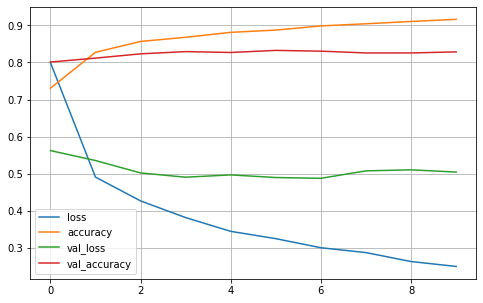

In [33]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

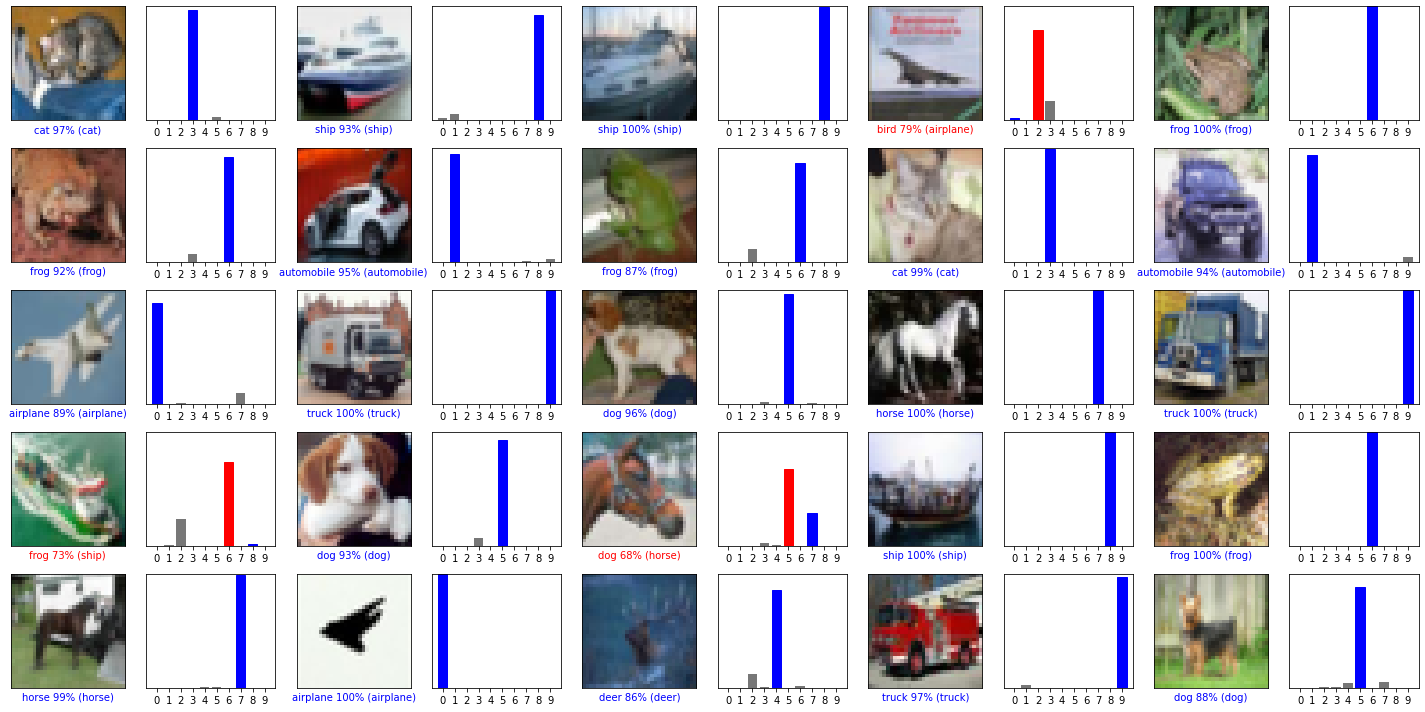

In [34]:
predictions = TL_model.predict(X_test_224x224)

show_15_predictions(predictions)

In [ ]:
test_loss, test_acc = TL_model.evaluate(X_test_224x224, y_test, verbose=1)

print('\nTest accuracy:', test_acc)

286/313 [==========================>...] - ETA: 11s - loss: 0.5171 - accuracy: 0.8312